# Feature Engineering - FEMA Large Disasters with Demographics

In [1]:
# Basic libraries
import geopandas as gpd
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Load FEMA Data

In [3]:
# Load FEMA data
flData = pd.read_csv("../../data/open-fema/FEMA-Large-DR-4337-FL.csv")
txData = pd.read_csv("../../data/open-fema/FEMA-Large-DR-4332-TX.csv")
prData = pd.read_csv("../../data/open-fema/FEMA-Large-DR-4339-PR.csv")

In [4]:
# Combine FL + PR + TX datasets
femaDf = pd.concat([flData, txData, prData])
print(f"There are {len(femaDf)} records in the dataframe.")

There are 4661523 records in the dataframe.


In [5]:
# Look at data types for each of the columns
femaDf.dtypes

disasterNumber                       int64
damagedCity                         object
damagedStateAbbreviation            object
damagedZipCode                     float64
householdComposition                 int64
grossIncome                        float64
specialNeeds                          bool
ownRent                             object
residenceType                       object
homeOwnersInsurance                   bool
floodInsurance                        bool
inspected                             bool
rpfvl                              float64
habitabilityRepairsRequired         object
destroyed                             bool
waterLevel                         float64
floodDamage                           bool
foundationDamage                      bool
foundationDamageAmount             float64
roofDamage                            bool
roofDamageAmount                   float64
tsaEligible                           bool
tsaCheckedIn                          bool
rentalAssis

In [6]:
femaDf.drop_duplicates(inplace=True)
print(f"There are {len(femaDf)} records after dropping any duplicates.")

There are 4661523 records after dropping any duplicates.


In [7]:
# Change incorrect datatype
femaDf['habitabilityRepairsRequired'] = femaDf['habitabilityRepairsRequired'].astype('bool')
femaDf['primaryResidence'] = femaDf['primaryResidence'].astype('bool')
femaDf['censusBlockId'] = femaDf['censusBlockId'].astype('str').replace('\.0', '', regex=True)
print(f"habitabilityRepairsRequired datatype: {femaDf['habitabilityRepairsRequired'].dtype}")
print(f"primaryResidence datatype: {femaDf['primaryResidence'].dtype}")
print(f"censusBlockId datatype: {femaDf['censusBlockId'].dtype}")

habitabilityRepairsRequired datatype: bool
primaryResidence datatype: bool
censusBlockId datatype: object


In [8]:
# Create census tract IDs for FEMA dataset
femaDf['censusTractId'] = femaDf.apply(lambda row: row.censusBlockId[0:11], axis=1)
femaDf[['censusBlockId', 'censusTractId']].head()

,censusBlockId,censusTractId
0,120111105011006,12011110501
1,120860011032003,12086001103
2,120830012043000,12083001204
3,120860135002000,12086013500
4,120090641241018,12009064124


In [9]:
# Create county FIPS codes
femaDf['fips'] = femaDf.apply(lambda row: row.censusBlockId[0:5], axis=1)
femaDf[['censusTractId', 'fips']].head()

,censusTractId,fips
0,12011110501,12011
1,12086001103,12086
2,12083001204,12083
3,12086013500,12086
4,12009064124,12009


### Load Census Demographics

In [11]:
# Load demographics data
demoDf = pd.read_csv("../../data/census-tract/census-tract-demographics.csv")
demoDf.head(3)

,censusid,gisjoin,tractid,tractname,county,state,total_population,male_population,female_population,total_population_edu,high_school_grad,bachelors_degree,graduate_prof_degree,high_school_grad_rate,bachelors_degree_rate,graduate_prof_degree_rate,bachelors_plus_degree_rate,total_population_employ,labor_force_total,civilian_labor_force,employed_labor_force,unemployed_labor_force,armed_forces_labor_force,not_labor_force_total,labor_force_rate,civilian_labor_rate,employed_labor_rate,unemployed_labor_rate,armed_forces_labor_rate,not_labor_force_rate,total_population_income,income_less_10k,income_10k_15k,income_15k_20k,income_20k_25k,income_25k_30k,income_30k_35k,income_35k_40k,income_40k_45k,income_45k_50k,income_50k_60k,income_60k_75k,income_75k_100k,income_100k_125k,income_125k_150k,income_150k_200k,income_200k_more,median_earnings_total,median_earnings_male,median_earnings_male_fulltime,median_earnings_male_other,median_earnings_female,median_earnings_female_fulltime,median_earnings_female_other,total_households_poverty,below_poverty,below_poverty_family,below_poverty_family_married,below_poverty_family_other,below_poverty_family_other_male_no_spouse,below_poverty_family_other_female_no_spouse,below_poverty_nonfamily,below_poverty_nonfamily_male,below_poverty_nonfamily_female,above_poverty,above_poverty_family,above_poverty_family_married,above_poverty_family_other,above_poverty_family_other_male_no_spouse,above_poverty_family_other_female_no_spouse,above_poverty_nonfamily,above_poverty_nonfamily_male,above_poverty_nonfamily_female,below_poverty_rate,below_poverty_family_rate,below_poverty_family_married_rate,below_poverty_family_other_rate,below_poverty_family_other_male_no_spouse_rate,below_poverty_family_other_female_no_spouse_rate,below_poverty_nonfamily_rate,below_poverty_nonfamily_male_rate,below_poverty_nonfamily_female_rate,above_poverty_rate,above_poverty_family_rate,above_poverty_family_married_rate,above_poverty_family_other_rate,above_poverty_family_other_male_no_spouse_rate,above_poverty_family_other_female_no_spouse_rate,above_poverty_nonfamily_rate,above_poverty_nonfamily_male_rate,above_poverty_nonfamily_female_rate,total_population_assist,with_assistance,without_assistance,with_assistance_rate,without_assistance_rate,total_housing_units,total_housing_units_rate,occupied_housing_units,occupied_housing_units_rate,vacant_housing_units,vacant_housing_units_rate,homeowner_vacancy_rate,homeowner_vacancy_rate_rate,rental_vacancy_rate,rental_vacancy_rate_rate,built_total_housing_units,built_total_housing_units_rate,built_2014_or_later,built_2014_or_later_rate,built_2010_to_2013,built_2010_to_2013_rate,built_2000_to_2009,built_2000_to_2009_rate,built_1990_to_1999,built_1990_to_1999_rate,built_1980_to_1989,built_1980_to_1989_rate,built_1970_to_1979,built_1970_to_1979_rate,built_1960_to_1969,built_1960_to_1969_rate,built_1950_to_1959,built_1950_to_1959_rate,built_1940_to_1949,built_1940_to_1949_rate,built_1939_or_earlier,built_1939_or_earlier_rate,tenure_occupied_housing_units,tenure_occupied_housing_units_rate,owner_occupied,owner_occupied_rate,renter_occupied,renter_occupied_rate,avg_size_owner_unit,avg_size_owner_unit_rate,avg_size_renter_unit,avg_size_of_renter__unit_rate,moved_occupied_housing_unit,moved_occupied_housing_unit_rate,moved_in_2015_or_later,moved_in_2015_or_later_rate,moved_in_2010_to_2014,moved_in_2010_to_2014_rate,moved_in_2000_to_2009,moved_in_2000_to_2009_rate,moved_in_1990_to_1999,moved_in_1990_to_1999_rate,moved_in_1980_to_1989,moved_in_1980_to_1989_rate,moved_in_1979_and_earlier,moved_in_1979_and_earlier_rate,lacking_complete_plumbing_facilities,lacking_complete_plumbing_facilities_rate,lacking_complete_kitchen_facilities,lacking_complete_kitchen_facilities_rate,no_telephone_service_available,no_telephone_service_available_rate,value_less_50k,value_less_50k_rate,value_50k_100k,value_50k_100k_rate,value_100k_150k,value_100k_150k_rate,value_150k_200k,value_150k_200k_rate,value_200k_300k,value_200k_30

In [12]:
# Check vars in index
print(demoDf.columns)

Index(['censusid', 'gisjoin', 'tractid', 'tractname', 'county', 'state',
       'total_population', 'male_population', 'female_population',
       'total_population_edu',
       ...
       'total_native_rate', 'native_in_state_rate', 'native_out_state_rate',
       'native_outside_us_rate', 'native_outside_us_puerto_rate',
       'native_outside_us_islands_rate', 'native_outside_us_abroad_rate',
       'total_foreign_rate', 'foreign_citizen_rate',
       'foreign_non_citizen_rate'],
      dtype='object', length=250)


In [13]:
# Change to tractid datatype to string
demoDf['tractid'] = demoDf['tractid'].astype('str')
print(f"tractid datatype: {demoDf['tractid'].dtype}")

tractid datatype: object


In [15]:
# Select subset of variables
demoDf = demoDf[['censusid', 'tractid', 'tractname', 'county', 'state', 'below_poverty_rate', 'median_earnings_total',
                 'unemployed_labor_rate', 'built_1979_or_earlier_rate', 'owner_occupied_rate']]

demoDf.head(3)

,censusid,tractid,tractname,county,state,below_poverty_rate,median_earnings_total,unemployed_labor_rate,built_1979_or_earlier_rate,owner_occupied_rate
0,1400000US12001000200,12001000200,"Census Tract 2, Alachua County, Florida",Alachua County,Florida,0.561760,6752.0,0.033528,0.412270,0.176396
1,1400000US12001000301,12001000301,"Census Tract 3.01, Alachua County, Florida",Alachua County,Florida,0.347230,20481.0,0.067448,0.630089,0.205597
2,1400000US12001000302,12001000302,"Census Tract 3.02, Alachua County, Florida",Alachua County,Florida,0.244323,25108.0,0.086468,0.834117,0.425976


### Combine Demographics with FEMA data

In [16]:
# Merge demographics and FEMA datasets
df = pd.merge(femaDf, demoDf, left_on='censusTractId', right_on='tractid')

In [17]:
# Check how many rows we have in the merged dataframe
print(f"There are {len(df)} records in the merged dataset.")
print(f"This is a {len(femaDf) - len(df)} difference b/w the original dataset and the merged.")

There are 4602394 records in the merged dataset.
This is a 59129 difference b/w the original dataset and the merged.


In [18]:
# Check how many census tracts are represented between TX & FL
print(f"There are {len(df['tractid'].unique())} tracts represented in the dataset.")
print(f"Of these, {len(df.loc[df['damagedStateAbbreviation'] == 'PR', 'censusid'].unique())} are from PR.")
print(f"Of these, {len(df.loc[df['damagedStateAbbreviation'] == 'TX', 'censusid'].unique())} are from TX.")
print(f"Of these, {len(df.loc[df['damagedStateAbbreviation'] == 'FL', 'censusid'].unique())} are from FL.")

There are 7512 tracts represented in the dataset.
Of these, 896 are from PR.
Of these, 2461 are from TX.
Of these, 4158 are from FL.


### HUD Fair Market Rates

In [19]:
# Load HUD Fair Market Rates
hudDf = pd.read_csv("../../data/hud/HUD-FMR-with-demo.csv")
hudDf.head(3)

,fips,county,occupied_housing_units_rate,vacant_housing_units_rate,owner_occupied_rate,fmr0,fmr1,fmr2,fmr3,fmr4,metro
0,12001,Alachua County,0.845622,0.154378,0.536000,624,717,878,1177,1339,1
1,12003,Baker County,0.843566,0.156434,0.775877,477,645,752,951,1266,1
2,12005,Bay County,0.676942,0.323058,0.624478,693,813,949,1359,1609,1


In [20]:
# Check vars in index
print(hudDf.columns)

Index(['fips', 'county', 'occupied_housing_units_rate',
       'vacant_housing_units_rate', 'owner_occupied_rate', 'fmr0', 'fmr1',
       'fmr2', 'fmr3', 'fmr4', 'metro'],
      dtype='object')


In [21]:
# Change to tractid datatype to string
hudDf['fips'] = hudDf['fips'].astype('str')
print(f"fips datatype: {hudDf['fips'].dtype}")

fips datatype: object


In [22]:
# Select subset of variables
hudDf = hudDf[['fips', 'fmr0', 'fmr1', 'fmr2', 'fmr3', 'fmr4',
                 'occupied_housing_units_rate', 'vacant_housing_units_rate', 'owner_occupied_rate']]

hudDf.head(3)

,fips,fmr0,fmr1,fmr2,fmr3,fmr4,occupied_housing_units_rate,vacant_housing_units_rate,owner_occupied_rate
0,12001,624,717,878,1177,1339,0.845622,0.154378,0.536000
1,12003,477,645,752,951,1266,0.843566,0.156434,0.775877
2,12005,693,813,949,1359,1609,0.676942,0.323058,0.624478


### Combine HUD with FEMA Data

In [25]:
# Original file size
original_len = len(df)

# Merge HUD and FEMA datasets
df = pd.merge(df, hudDf, left_on='fips', right_on='fips')

print(f"There are {len(df)} records in the dataset merged with HUD.")
print(f"This is a {original_len - len(df)} difference b/w the original dataset and the merged.")

There are 4602394 records in the dataset merged with HUD.
This is a 0 difference b/w the original dataset and the merged.


### Feature Engineering

In [26]:
# Define all dollar amount columns
amountCols = ['foundationDamageAmount', 'roofDamageAmount', 'rentalAssistanceAmount', 
              'replacementAmount','repairAmount', 'rpfvl', 'ppfvl']

# Set them to zero if null
df[amountCols] = df[amountCols].fillna(0)

# Calculate the aggregated haAmount
df['haAmount'] = df['rentalAssistanceAmount'] + df['replacementAmount'] + df['repairAmount']

print('Total ${:,.2f} in HA payouts'.format(df['haAmount'].sum()))
print('Total ${:,.2f} in mainland HA payouts'.format(df.loc[df['damagedStateAbbreviation'] != 'PR', 'haAmount'].sum()))

Total $2,580,177,998.38 in HA payouts
Total $1,931,168,720.31 in mainland HA payouts


In [27]:
# Convert boolean columns to int
bool_cols = ['specialNeeds', 'homeOwnersInsurance', 'floodInsurance', 'inspected', 'destroyed', 
             'habitabilityRepairsRequired', 'floodDamage', 'foundationDamage', 'roofDamage', 
             'tsaEligible', 'rentalAssistanceEligible', 'repairAssistanceEligible', 
             'replacementAssistanceEligible', 'sbaEligible', 'primaryResidence']

df[bool_cols] = df[bool_cols].astype(int)

In [28]:
# Fill the na's with zero's in waterLevel 
df['waterLevel'].fillna(0, inplace=True)

In [29]:
# One-hot encode the categorical variables
cat_cols = ['ownRent', 'residenceType']
for col in cat_cols:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
df.drop(cat_cols, axis=1, inplace=True)

### Create Train and Test - With Outliers

In [30]:
# Train (FL/TX) data
trainDf = df.loc[df['damagedStateAbbreviation'] != 'PR', ]

# Write train to csv
trainDf.to_csv("../../data/open-fema/FEMA-Large-Demographics-hud-FL-TX.csv", index=False, encoding='utf-8')
print('Train (FL/TX) rows:', len(trainDf))

Train (FL/TX) rows: 3535319


In [31]:
# Test (PR) data
testDf = df.loc[df['damagedStateAbbreviation'] == 'PR', ]

# Write test to csv
testDf.to_csv("../../data/open-fema/FEMA-Large-Demographics-hud-PR.csv", index=False, encoding='utf-8')
print('Test (PR) rows:', len(testDf))

Test (PR) rows: 1067075


### Treat Outliers

In [30]:
# Do drop uninspected with HA amount
print(f"Expected amount of rows after dropped: {len(df) - len(df[(df['haAmount']>0) & (df['inspected']==False)])}")
uninspected = df.loc[(df['haAmount'] > 0) & (df['inspected'] == False)].index
df.drop(uninspected, inplace=True)
print(f"Amount after dropped: {len(df)}")

Expected amount of rows after dropped: 4229511
Amount after dropped: 4229511


In [31]:
# Drop those with HA amount over max
print(f"Expected amount of rows after dropped: {len(df) - len(df[(df['haAmount'] > 33300)])}")
maxLimit_ha = df.loc[(df['haAmount'] > 33300)].index
df.drop(maxLimit_ha, inplace=True)
print(f"Amount after dropped: {len(df)}")

Expected amount of rows after dropped: 4229498
Amount after dropped: 4229498


In [32]:
# Drop those with household composition over 15
print(f"Expected amount of rows after dropped: {len(df) - len(df[(df['householdComposition'] > 15)])}")
maxLimit_house = df.loc[(df['householdComposition'] > 15)].index
df.drop(maxLimit_house, inplace=True)
print(f"Amount after dropped: {len(df)}")

Expected amount of rows after dropped: 4229436
Amount after dropped: 4229436


In [33]:
# Drop those with water level over 120
print(f"Expected amount of rows after dropped: {len(df) - len(df[(df['waterLevel'] > 120)])}")
maxLimit_water = df.loc[(df['waterLevel'] > 120)].index
df.drop(maxLimit_water, inplace=True)
print(f"Amount after dropped: {len(df)}")

Expected amount of rows after dropped: 4229030
Amount after dropped: 4229030


### Create Train and Test - Outliers Removed

In [34]:
# Create train without outliers
trainDf = df.loc[df['damagedStateAbbreviation'] != 'PR', ]

# Write train to csv
trainDf.to_csv("../../data/open-fema/FEMA-Large-Demographics-hud-FL-TX-clean.csv", index=False, encoding='utf-8')
print('Train (FL/TX) rows:', len(trainDf))

Train (FL/TX) rows: 3187285


In [35]:
# Create test without outliers
testDf = df.loc[df['damagedStateAbbreviation'] == 'PR', ]

# Write test to csv
testDf.to_csv("../../data/open-fema/FEMA-Large-Demographics-hud-PR-clean.csv", index=False, encoding='utf-8')
print('Test (PR) rows:', len(testDf))

Test (PR) rows: 1041745


### householdComposition vs. rentalAssistanceAmount

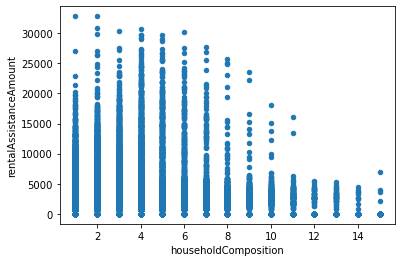

In [38]:
trainDf.plot(x='householdComposition', y='rentalAssistanceAmount', kind='scatter')